**Notas para contenedor de docker:**

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `dir_montar` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

```
dir_montar=<ruta completa de mi máquina a mi directorio>#aquí colocar la ruta al directorio a montar, por ejemplo: 
#dir_montar=/Users/erick/midirectorio.
```

Ejecutar:

```
$docker run --rm -v $dir_montar:/datos --name jupyterlab_prope_r_kernel_tidyverse -p 8888:8888 -d palmoreck/jupyterlab_prope_r_kernel_tidyverse:2.1.4   

```

Ir a `localhost:8888` y escribir el password para jupyterlab: `qwerty`

Detener el contenedor de docker:

```
docker stop jupyterlab_prope_r_kernel_tidyverse
```


Documentación de la imagen de docker `palmoreck/jupyterlab_prope_r_kernel_tidyverse:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/prope_r_kernel_tidyverse).

---

Para ejecución de la nota usar:

[docker](https://www.docker.com/) (instalación de forma **local** con [Get docker](https://docs.docker.com/install/)) y ejecutar comandos que están al inicio de la nota de forma **local**. 

O bien dar click en alguno de los botones siguientes:

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/palmoreck/dockerfiles-for-binder/jupyterlab_prope_r_kernel_tidyerse?urlpath=lab/tree/Propedeutico/R/clases/3_estadistica/4_regresion.ipynb) esta opción crea una máquina individual en un servidor de Google, clona el repositorio y permite la ejecución de los notebooks de jupyter.

[![Run on Repl.it](https://repl.it/badge/github/palmoreck/dummy)](https://repl.it/languages/Rlang) esta opción no clona el repositorio, no ejecuta los notebooks de jupyter pero permite ejecución de instrucciones de Python de forma colaborativa con [repl.it](https://repl.it/). Al dar click se crearán nuevos ***repl*** debajo de sus users de ***repl.it***.


### Lo siguiente está basado en los libros:

### * B. Rumbos, Pensando Antes de Actuar: Fundamentos de Elección Racional, 2009

### * G. J. Kerns, Introduction to Probability and Statistics Using R, 2014.

### * M.D. Ugarte, A. F. Militino, A. T. Arnholt, Probability and Statistics with R", 2ed.


El libro de G. J. Kerns tiene github: [jkerns/IPSUR](https://github.com/gjkerns/IPSUR)

El libro de M. D. Ugarte, A. F. Militino, A. T. Arnholttiene github de scripts [alanarnholt/PASWR2E-Rscripts](https://github.com/alanarnholt/PASWR2E-Rscripts)


**Nota:**

* En algunas líneas no es necesario colocar `print` y sólo se ha realizado para mostrar los resultados de las funciones en un formato similar al de R pues la nota se escribió con *jupyterlab* y *R*.

In [1]:
library(ggplot2)

In [2]:
options(repr.plot.width=6, repr.plot.height=6) #esta línea sólo se ejecuta para jupyterlab con R

# Introducción

Con frecuencia es necesario determinar si dos variables aleatorias están relacionadas de alguna manera. Por ejemplo ¿tendrán los años de educación efecto sobre el salario que percibe una persona? 

La relación entre dos variables cuantitativas puede visualizarse en un **diagrama de dispersión** en el plano, representando los valores de las variables en los ejes horizontal y vertical. También el coeficiente de correlación de Pearson ayuda a determinar si exsite alguna relación **lineal** entre las variables de modo que se escribe si están **positivamente, negativamente o no correlacionadas**. Ver [1_elementos_de_estadistica_descriptiva](https://github.com/ITAM-DS/Propedeutico/blob/master/R/clases/3_estadistica/1_elementos_de_estadistica_descriptiva.ipynb).

Un ejemplo de una relación lineal es considerar la altura y peso de una persona. Por ejemplo para los datos:

In [3]:
heights <- c(1.94, 1.82, 1.75, 1.80, 1.62, 1.64, 1.68, 1.46, 
             1.50, 1.55, 1.72, 1.67, 1.57, 1.60, 1.70)
weights <- c(98, 80, 72, 83, 65, 70, 67, 47, 45, 50, 70,
             61, 50, 52, 200)

Se tiene la siguiente gráfica:

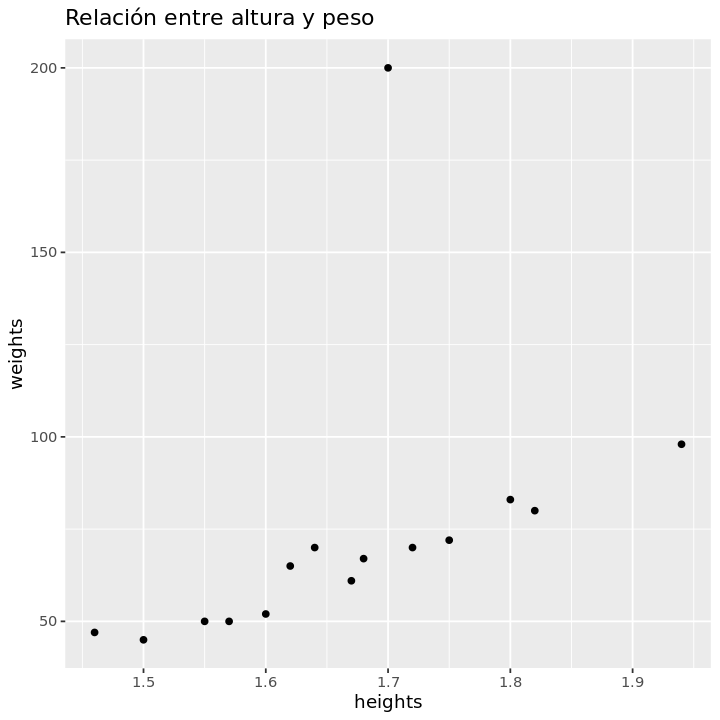

In [4]:
qplot(heights, weights, main = "Relación entre altura y peso")

Se observa una clara relación **lineal** entre el peso y altura de una persona si no consideramos el punto que sobresale en todos los demás.  La altura y peso tienden a aumentar o disminuir juntos. Escribimos en este caso que ambas variables están **positivamente correlacionadas**. El dato atípico o *outlier* debe determinarse si ¿es un error de medición? ¿la persona es atípicamente obesa pues tiene una altura de $1.70$ y $200 kg$?.

También puede darse la situación de que no exista relación alguna entre variables por ejemplo si a los datos de altura anteriores les graficamos con el ingreso de las personas se tiene:

In [5]:
wages <- c(9500, 11000, 16000, 5000, 10000, 10500, 65000, 5000, 5000,
           33000, 25000, 48000, 8000, 5000, 23000)

In [6]:
length(wages)

[1] 15

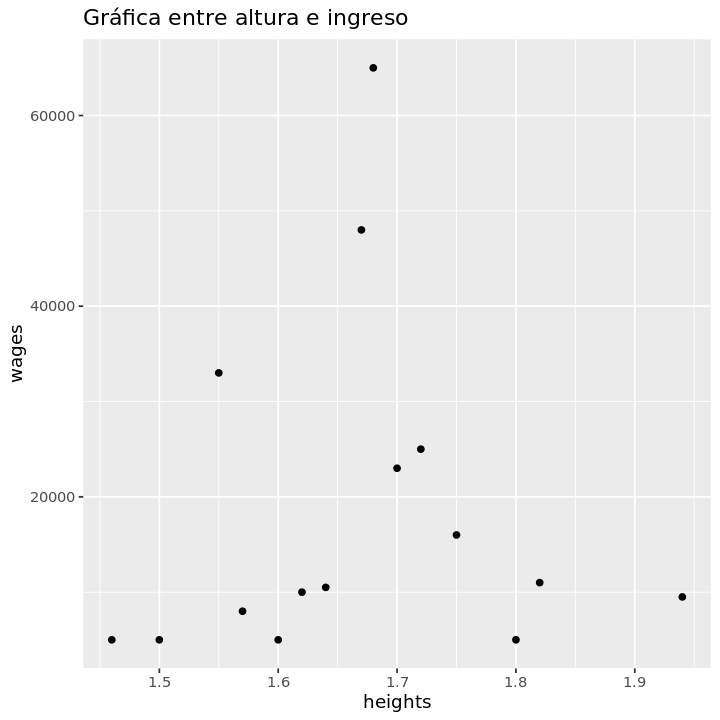

In [7]:
qplot(heights, wages, main = "Gráfica entre altura e ingreso")

En esta gráfica no observamos relación alguna entre ingreso y altura de las personas. 

Y la asociación más simple entre variables es cuando éstas se relacionan en forma lineal, sin embargo, no siempre es posible establecer este tipo de relación entre ellas. Por ejemplo, si tomamos el número promedio de infecciones respiratorias al año que sufre un niño de los 0 a los 12 años con los siguientes datos:

In [8]:
ages <- c(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)

number_of_respiratory_infections <- c(2, 3, 5, 5, 8, 10, 15,
                                      12, 8, 5, 3, 3, 3)

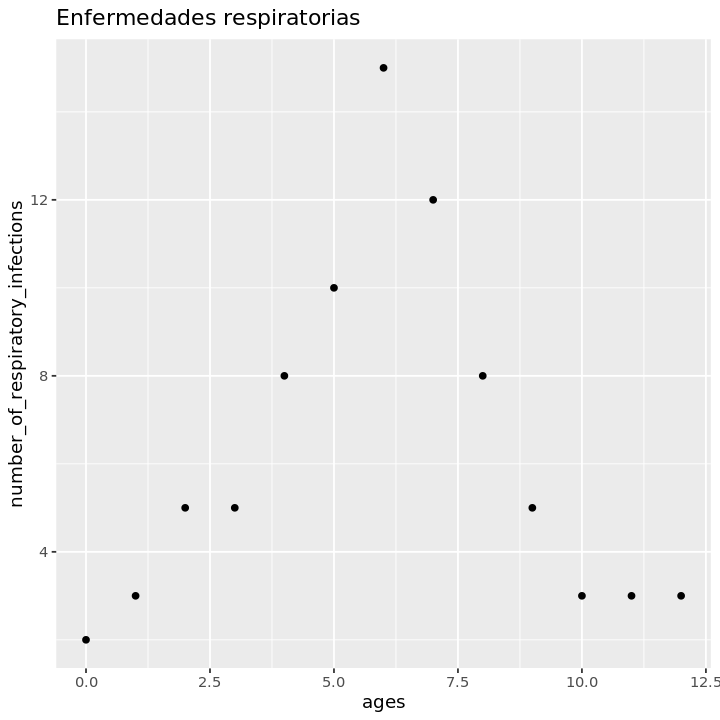

In [9]:
qplot(ages, number_of_respiratory_infections, main="Enfermedades respiratorias")

Observamos en la gráfica anterior que existe relación y podría determinarse una curva con un valor máximo alrededor de los 6 años como una posible relación apropiada en este caso y no una recta.

# Análisis de Regresión Lineal Simple (ARLS)

## Objetivos en el ARLS

El **análisis de regresión** es la herramienta en Estadística que estudia las relaciones entre variables para:

* Explicar/Estimar/Predecir/Controlar a una variable dependiente en términos de la variables independientes.

* Identificar a las variables independientes estadísticamente significativas.


## Modelo y suposiciones en el ARLS


En lo siguiente consideramos $x$ variable **no aleatoria**, puede ser cuantitativa (discreta o continua) o cualitativa (nominal u ordinal) que nombramos variable explicativa, independiente, regresora o predictora, $Y$ variable **aleatoria continua** que depende de $x$ y por tanto nombramos dependiente o respuesta.

Como se describió en la sección anterior encontrar relaciones entre variables puede ser complicado y en el ARLS se considera a la cantidad $E[Y]$ asumiendo el modelo:

$$E[Y] = \mu(x | \beta) = \beta_0 + \beta_1 x$$

donde: $\beta_0 , \beta_1$ son parámetros desconocidos. 

**Obs:** si existe relación entre $Y$ y $x$ esta relación típicamente se escribe como $E[Y|x] = \beta_0 + \beta_1 x$ para denotar que la media de la variable $Y$ es función de x (la variable explicativa únicamente tiene efecto sobre la media de la distribución de $Y$). Si $Y$ no fuera función de $x$ entonces $\bar{Y}$ sería una buena opción para los objetivos del ARLS $E[Y]$.

En el ARLS asumimos que el valor aleatorio de $Y$ se distribuye como una Normal con media igual a la altura de la recta de regresión en el valor x, esto es, por cada valor de $x$ observamos un valor aleatorio de $Y$ que en promedio se encuentra localizado sobre la recta de regresión:

<img src="https://dl.dropboxusercontent.com/s/v9qu9msa02dn0hn/regression_normal_curves.png?dl=0" heigth="500" width="500">

Gráfica creada con el código en [PASWR2E-chapter12](https://github.com/alanarnholt/PASWR2E-Rscripts/blob/master/ChapterScripts/chapter12.R). 

Además como se observa en la gráfica anterior asumimos que la varianza es idéntica para todos los valores de $x$ (obsérvese que las distribuciones normales para cualquier valor $x$ tienen misma varianza). Si se denota a cada punto donde se evalúan $E(Y|x_1), E(Y|x_2) \dots, E(Y|x_m)$ como: $Y_1 = Y|x_1, Y_2 = Y|x_2 \dots, Y_m = Y|x_m$ entonces tendremos un conjunto de puntos $(x_i, Y_i)$ en los que las $Y_i$'s tienen un ruido aleatorio y además asumimos $Y_i | x_i$ es independiente de $Y_j | x_j$ si $i \neq j$.

El **modelo** considerando la nube de puntos $(x_i, Y_i)$ es:

$$Y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$

$\forall i=1,\dots, m$ donde: $Y_i$ variable aleatoria dependiente cuantitativa, $x_i$ variable no aleatoria explicativa de cualquier tipo (cuantitativa o cualitativa), $\epsilon_i$ término de error aleatorio, $\beta_0$ y $\beta_1$ parámetros del modelo en ARLS.

**Supuestos del modelo:**

0. Los puntos $(x_i,Y_i)$  $\forall i=1, \dots,m$ cumplen que $Y_i$ es dependiente de $x_i$ y la nube de puntos son mediciones independientes.

1. $E[\epsilon_i | x_i] = 0$ $\forall i=1, \dots, n$ la media de los errores es igual a cero. Este supuesto ayuda a tener correctamente determinado al coeficiente $\beta_0$.


2. $\text{Var}(\epsilon_i|x_i) = \sigma^2$ la varianza del error es homocedástica (misma dispersión) $\forall i=1, \dots, m$.



3. $\text{Cov}(\epsilon_i, \epsilon_j | x_i, x_j) = 0$ para $i \neq j$, la covarianza\* entre los errores es cero.

\*La covarianza entre dos variables aleatorias $z_1, z_2$ se define como $\text{Cov}(z_1, z_2) = E[(z_1 - E[z_1])(z_2 - E[z_2])]$ y mide la variabilidad conjunta entre $z_1, z_2$. Puede ser positiva (comportamiento similar: valores grandes en $z_1$ muestran valores grandes en $z_2$), negativa o cero y su magnitud no tiene directamente una interpretación, en este caso se utiliza la correlación que es una versión de la covarianza normalizada para medir la relación lineal entre $z_1, z_2$.

4. $\epsilon_i | x_i \sim N(0, \sigma^2)$: los errores tienen una distribución normal, ver [2_distribuciones_comunes](https://github.com/ITAM-DS/Propedeutico/blob/master/R/clases/3_estadistica/2_distribuciones_comunes.ipynb). Por lo tanto los errores $\epsilon_i$ son independientes e idénticamente distribuidas (i.i.d) $N(0,\sigma^2)$ $\forall i=1, \dots, m$.

Con los supuestos anteriores se tiene:

* $Y_i|x_i \sim N(\beta_0 + \beta_1 x_i, \sigma^2).$ Obsérvese que las $Y_i$'s son independientes pero **no** son idénticamente distribuidas.

* Modelar $E[Y|x]$ es equivalente a modelar $Y = E[Y|x] + \epsilon$ con $\epsilon$ error aleatorio.


**Comentario:** aunque la relación entre las variables no sea inicialmente lineal, puede volverse lineal mediante alguna transformación. Muchas transformaciones útiles caen en la familia del nombre de [Power transform](https://en.wikipedia.org/wiki/Power_transform) entre las que se encuentran la de Box-Cox.

## Mínimos cuadrados lineales y el ARLS: proceso de ajuste para $\beta_0, \beta_1$

El ARLS no sólo se ocupa de la correlación lineal entre las variables, sino determina la línea recta que mejor aproxima a los puntos. El método más común para calcular tal recta minimiza las sumas de los cuadrados de las distancias verticales y se conoce como mínimos cuadrados lineales u ordinarios, ver [3_minimos_cuadrados](https://github.com/ITAM-DS/Propedeutico/blob/master/Python/clases/3_algebra_lineal/3_minimos_cuadrados.ipynb). En este método se calculan los cuadrados de las distancias de los datos a la recta para evitar que una distancia positiva y una negativa se cancelen por ejemplo:

In [10]:
var1 <- c(1,2,3,4)
var2 <- c(3,2,5,4)

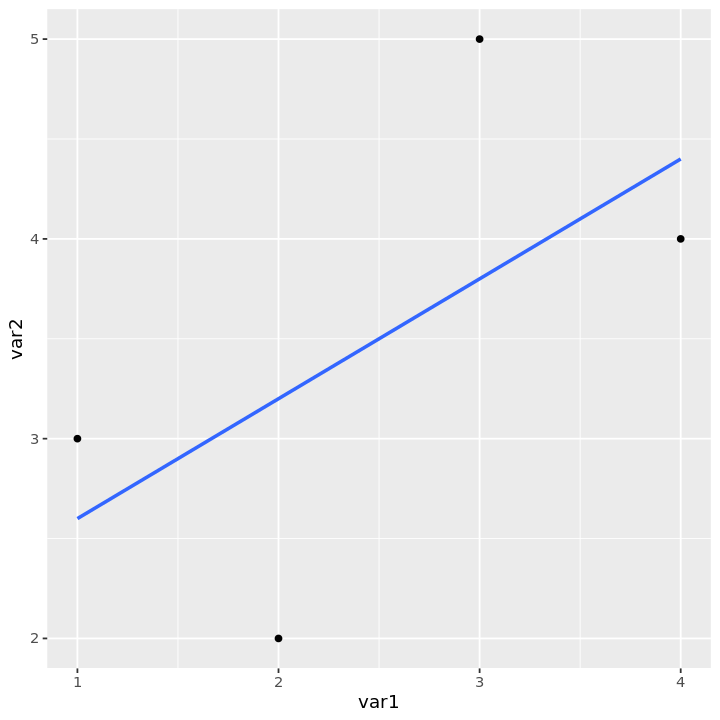

In [11]:
qplot(var1, var2) + 
geom_smooth(formula = "y~x", aes(x=var1, y=var2),method="lm", se = FALSE)

**Considerando un conjunto de observaciones de las $x_i$'s y de las $Y_i$'s**

Supóngase que se han realizado mediciones de un fenómeno de interés en diferentes puntos $x_i$'s resultando en cantidades $y_i$'s $\forall i=1,\dots, m$, esto es, se tienen $m$ puntos $(x_i,y_i)$ en los que  el punto $(x_i, y_i)$ es una medición independiente del punto $(x_j, y_j)$ con $i \neq j$ y además las $y_i$'s contienen un ruido aleatorio causado por errores de medición:


<img src="https://dl.dropboxusercontent.com/s/z0ksltumd4ibyjp/mcuadrados_1.jpg?dl=0" heigth="400" width="400">


Entonces de acuerdo a [3_minimos_cuadrados](https://github.com/ITAM-DS/Propedeutico/blob/master/Python/clases/3_algebra_lineal/3_minimos_cuadrados.ipynb) el proceso de ajuste en ARLS consiste en resolver las **ecuaciones normales**:

$$A^TA \beta = A^Ty$$

donde:

$$A = \left[\begin{array}{cc}
1 & x_1\\
1 &x_2\\
\vdots &\vdots\\
1 &x_n\\
\vdots &\vdots\\
1 & x_{m-1}\\
1 &x_m
\end{array}
\right] \in \mathbb{R}^{mx2},
\beta=
\left[\begin{array}{c}
\beta_0\\
\beta_1\\
\end{array}
\right] \in \mathbb{R}^2,
y=
\left[\begin{array}{c}
y_1\\
y_2\\
\vdots \\
y_m
\end{array}
\right] \in \mathbb{R}^m
$$

Otra forma es considerar la función de verosimilitud de los parámetros $\beta_0, \beta_1$ y maximizarla. Ver [Likelihood function](https://en.wikipedia.org/wiki/Likelihood_function). Cualquiera que sea el método (mínimos cuadrados o máxima verosimilitud) las expresiones para los coeficientes ajustados $\hat{\beta_0}, \hat{\beta_1}$ son los siguientes: 

$$\hat{\beta}_1 = \frac{\displaystyle \sum_{i=1}^m x_iy_i - m \bar{x} \bar{y}}{\displaystyle \sum_{i=1}^m x_i^2 - m \bar{x}^2} = \frac{\displaystyle \sum_{i=1}^m (x_i - \bar{x}) y_i}{\displaystyle \sum_{i=1}^m(x_i - \bar{x})^2} =\frac{\displaystyle \sum_{i=1}^m(x_i - \bar{x})(y_i - \bar{y})}{\displaystyle \sum_{i=1}^m(x_i -\bar{x})^2} = \frac{SC_{xy}}{SC_{xx}}$$

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} = \displaystyle \sum_{i=1}^m \left( \frac{1}{m} - \frac{\bar{x}(x_i - \bar{x})}{\displaystyle \sum_{i=1}^m(x_i - \bar{x})^2} \right ) y_i$$

donde: $SC_{xy}$ y $SC_{xx}$ son la suma de cuadrados respecto a $x,y$ y la suma de cuadrados respecto a $x,x$ respectivamente.

**Obs:** 

* Obsérvese que el ajuste para los parámetros $\beta$'s, $\hat{\beta}_0 , \hat{\beta}_1$, son combinaciones lineales de las $y_i$'s. 

* Como $\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$ entonces $\bar{y} = \hat{\beta}_0 + \hat{\beta}_1 \bar{x}$ por lo que el punto $(\bar{x}, \bar{y})$ está en la recta de regresión.

* Si $\hat{\beta_1} = 0$ (y por tanto $x$ no explica la variabilidad de $Y$) entonces $\hat{\beta_0} = \bar{y}$ (la mejor estimación es con la media de los valores $y_i$'s).

Entonces la recta por mínimos cuadrados está dada por la forma funcional:

$$\mu(x | \hat{\beta}_0, \hat{\beta}_1) = \hat{\beta}_0 + \hat{\beta}_1 x .$$

## Propiedades de $\hat{\beta}_0, \hat{\beta}_1$

Por la observación anterior: $\hat{\beta}_0 , \hat{\beta}_1$ son combinaciones lineales de las $y_i$'s. Entonces considerando que $Y_i$'s son aleatorias se tiene que $\hat{\beta}_0 , \hat{\beta}_1$, son aleatorias. De hecho cumplen:

* $E[\hat{\beta}_0 | x] = \beta_0$

* $E[\hat{\beta}_1 | x] = \beta_1$

por lo que son estimadores insesgados (en promedio no sobreestiman ni subestiman los parámetros $\beta_0, \beta_1$). Aquí se utilizó la notación $x = (x_1, \dots, x_m)^T$.



* $\text{Var}(\hat{\beta}_0 | x) = \sigma^2 \left(\frac{1}{n} + \frac{\bar{x}^2}{SC_{xx}} \right)$.

* $\text{Var}(\hat{\beta}_1 | x) = \frac{\sigma^2}{SC_{xx}}$.

* $\text{Cov}(\hat{\beta}_0, \hat{\beta}_1 | x) = -\bar{x} \text{Var}(\hat{\beta}_1)$.

## Valores ajustados

Denotamos como $\hat{y}_i$ a los valores ajustados y se definen como:

$$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1x_i \forall i=1, \dots, m.$$

**Obs:** obsérvese que si $\hat{y}$ denota al vector de valores ajustados matricialmente la definición anterior es $\hat{y} = A x$.

## Residuales

Denotamos como $\hat{e}_i$ a los residuales y se definen como:

$$\hat{e}_i = y_i - \hat{y}_i \forall i=1,\dots, m.$$



**Obs:** se espera que $\hat{e}_i$ refleje a $\epsilon_i$. Para lo anterior se realiza un **análisis de residuales** que incluye verificación de:

* $N(0, \sigma^2)$ normalidad con media $0$ y homocedasticidad.

* Correlación igual a $0$ entre los residuales.



## Dataset cars

In [12]:
options(digits=4) #for number of digits in print lines

Para describir al ARLS consideramos el *dataset* de [cars](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/cars.html) de R

In [13]:
head(cars)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


La columna `speed` representa qué tan rápido iban carros en millas por hora y `dist` mide qué tanta distancia les tomó a carros detenerse y está medida en pies. Ver `?cars`.

Se considerará a la variable `speed` como la variable regresora ($x$) y `dist` como la variable dependiente ($Y$).

Podemos hacer un *scatterplot*:


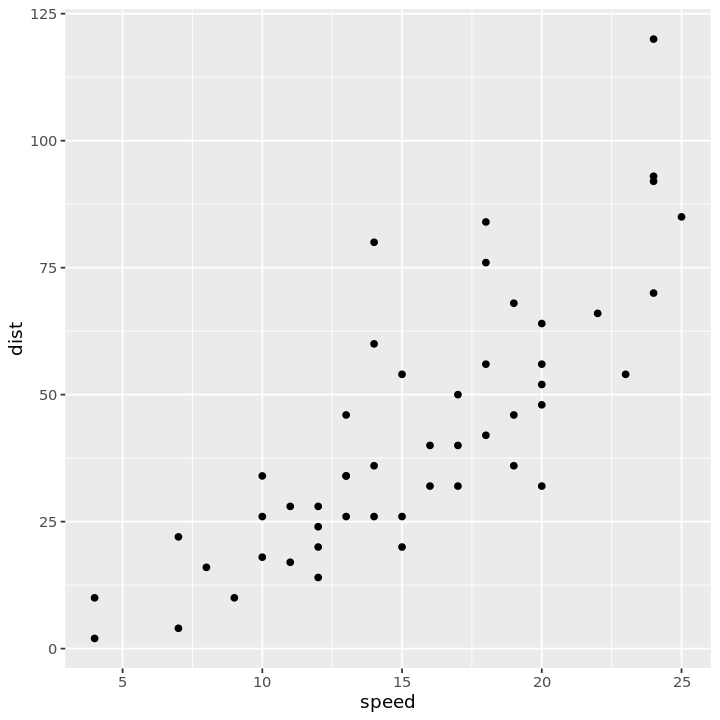

In [14]:
qplot(speed, dist, data = cars)

Se observa una relación aproximadamente lineal entre `dist` y `speed`, no se observan datos atípicos o *outliers* y además una tendencia creciente.

Realizamos el ARLS con la función [lm](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/lm) de R:

In [15]:
cars_lm <- lm(dist ~ speed, data = cars)

In [16]:
class(cars_lm)

[1] "lm"

**Obs:** `dist ~ speed` es una [formula](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/formula) que se lee como "la variable `dist` está descrita o modelada por la variable `speed`". 

Los coeficientes de la regresión pueden obtenerse a partir del objeto tipo `lm` anterior con la función [coef](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/coef) y también usando el símbolo \$:

In [17]:
print(coef(cars_lm))

(Intercept)       speed 
    -17.579       3.932 


In [18]:
gf <- ggplot(cars, aes(x = speed, y = dist))

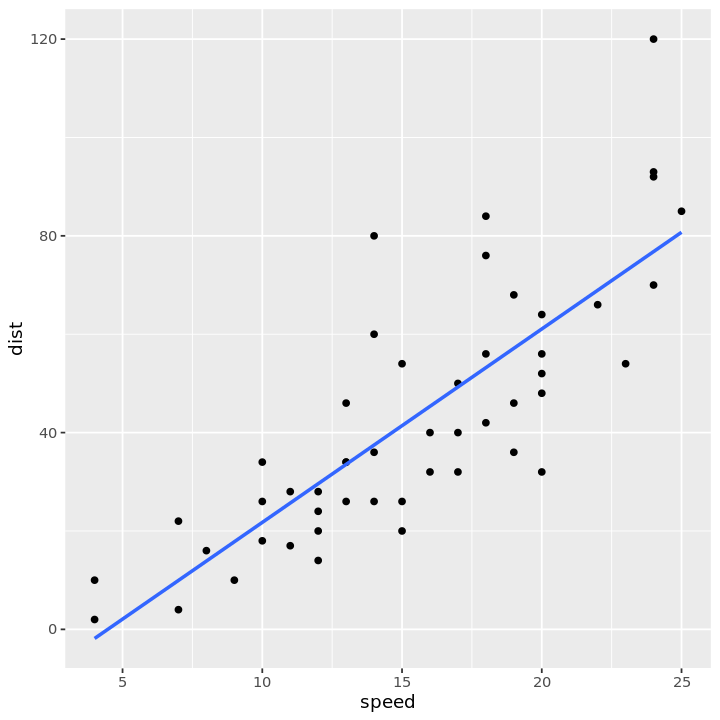

In [19]:
gf + 
geom_point() + 
geom_smooth(formula = "y~x", method = lm, se = FALSE)

**Pregunta: el dato de $8$ mph es un valor en la variable de `speed` ¿cuál es la media de la distancia (en pies) que le toma a un carro detenerse que va a una velocidad de 8 mph?**

In [20]:
beta_0 <- as.double(cars_lm$coef["(Intercept)"])

In [21]:
beta_1 <- as.double(cars_lm$coef["speed"])

In [22]:
speed_value <- 8
dist_value <- beta_0 + beta_1 * 8
print(dist_value)

[1] 13.88


Como se escribió en la pregunta el dato de $8$ mph está en la variable `speed`:

In [23]:
ind <- cars$speed == 8 

In [24]:
print(ind)

 [1] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE


In [25]:
print(fitted(cars_lm)[ind])

    5 
13.88 


Ver [fitted](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/fitted).

**Pregunta: ¿qué interpretación se le puede dar a $\hat{\beta}_0$?**

In [26]:
print(beta_0)

[1] -17.58


$\hat{\beta}_0$ se considera un parámetro de ruido y su interpretación para este ejemplo puede enunciarse como "la distancia promedio que le tomó a carros detenerse que iban a una velocidad de $0$ mph fue de  $-17.58$ pies". En este ejemplo no podemos escribir en un reporte tal enunciado pues las distancias son positivas. En este caso $\beta_0$ solamente ayuda a realizar el ajuste a los datos de `cars` y si revisamos el valor mínimo de la variable `speed` es:

In [27]:
min(cars$speed)

[1] 4

por lo que realizar enunciados para valores de la variable `speed` que son lejanos (conocido con el nombre de extrapolación, ver [2_interpolacion](https://github.com/ITAM-DS/Propedeutico/blob/master/Python/clases/3_algebra_lineal/2_interpolacion.ipynb)) del intervalo de ajuste debe realizarse con cuidado.

**Pregunta: ¿qué interpretación se le puede dar a $\hat{\beta}_1$?**

In [28]:
print(beta_1)

[1] 3.932


La interpretación se enuncia en términos de incrementos de unidades para la variable explicativa respecto a un incremento (pues el signo de $\beta_1$ en este caso es positivo) en promedio para la variable dependiente. En el ejemplo se puede enunciar que "un incremento de una milla por hora en la variable `speed` en promedio le toma una distancia de $3.93$ pies adicionales para detenerse".

**Pregunta: ¿cuáles son los valores ajustados $\hat{y}_i$ para $i=1,\dots,6$?**

In [29]:
print(head(fitted(cars_lm)))

     1      2      3      4      5      6 
-1.849 -1.849  9.948  9.948 13.880 17.813 


**Pregunta: ¿cuáles son los residuales $\hat{e}_i$ para $i=1,\dots, 6$?**

In [30]:
print(head(residuals(cars_lm)))

     1      2      3      4      5      6 
 3.849 11.849 -5.948 12.052  2.120 -7.813 


Ver [residuals](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/residuals).

**Pregunta: ¿cuáles son valores predichos por el modelo para datos de `speed` con valores de 6, 8 y 21 mph?**

In [31]:
df_new <- data.frame(speed = c(6, 8, 21))
print(predict(cars_lm, newdata = df_new))

     1      2      3 
 6.015 13.880 65.001 
